In [455]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error

In [456]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Predictive Modelling | MBAN 5110 U /Hackathon/Updated_XYZ_Sportswear_Orders_Dataset.csv')

In [457]:
df.head()

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route,Value per Item
0,01.01.2009,18.02.2009,DE,PK003,Economy Parka,VO,COD00001,269.87,EUR,8,East,33.733750
1,01.01.2009,10.02.2009,FR,PK001,Advanced Parka,VO,COD00002,170.34,EUR,2,West,85.170000
2,01.01.2009,17.01.2009,ES,PK002,Premium Parka,VO,COD00003,61.09,EUR,7,West,8.727143
3,03.01.2009,28.01.2009,IT,PK003,Economy Parka,VO,COD00004,251.18,EUR,6,North,41.863333
4,03.01.2009,18.01.2009,DE,PK004,Basic Parka,VO,COD00005,153.33,EUR,5,West,30.666000


In [458]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d.%m.%Y')  # Adjust the format as per your data
df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'], format='%d.%m.%Y')  # Adjust the format

# Extract month and year from 'Order Date'
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

# Extract month and year from 'Requested Delivery Date'
df['Delivery Month'] = df['Requested Delivery Date'].dt.month
df['Delivery Year'] = df['Requested Delivery Date'].dt.year

In [459]:
df.head()

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route,Value per Item,Order Month,Order Year,Delivery Month,Delivery Year
0,2009-01-01,2009-02-18,DE,PK003,Economy Parka,VO,COD00001,269.87,EUR,8,East,33.733750,1,2009,2,2009
1,2009-01-01,2009-02-10,FR,PK001,Advanced Parka,VO,COD00002,170.34,EUR,2,West,85.170000,1,2009,2,2009
2,2009-01-01,2009-01-17,ES,PK002,Premium Parka,VO,COD00003,61.09,EUR,7,West,8.727143,1,2009,1,2009
3,2009-01-03,2009-01-28,IT,PK003,Economy Parka,VO,COD00004,251.18,EUR,6,North,41.863333,1,2009,1,2009
4,2009-01-03,2009-01-18,DE,PK004,Basic Parka,VO,COD00005,153.33,EUR,5,West,30.666000,1,2009,1,2009


In [460]:
# Aggregate order values by month and year
monthly_orders = df.groupby(['Order Year', 'Order Month']).agg({'Value': 'sum'}).reset_index()

# Sort the data for better visualization
monthly_orders = monthly_orders.sort_values(by=['Order Year', 'Order Month'])


In [461]:
# Create a continuous date from year and month
df['Continuous Date'] = pd.to_datetime(df['Order Year'].astype(str) + '-' + df['Order Month'].astype(str) + '-01')

# Aggregate order values by the continuous date
continuous_orders = df.groupby('Continuous Date').agg({'Value': 'sum'}).reset_index()

# Sort the data
continuous_orders = continuous_orders.sort_values('Continuous Date')


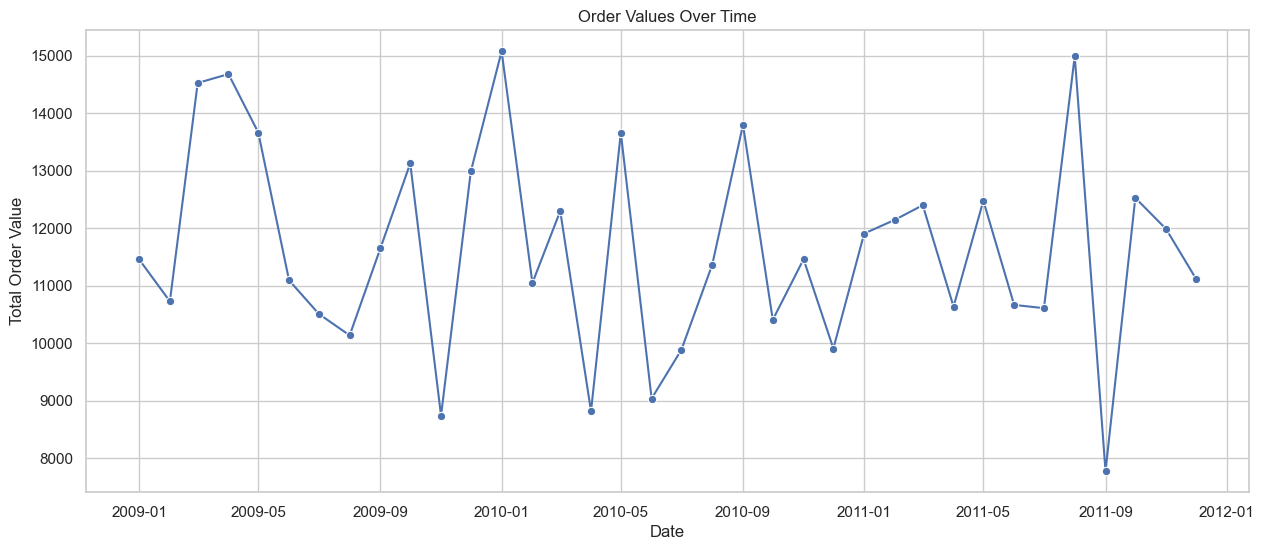

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(15, 6))
sns.lineplot(x="Continuous Date", y="Value", data=continuous_orders, marker='o')

# Add title and labels
plt.title('Order Values Over Time')
plt.xlabel('Date')
plt.ylabel('Total Order Value')

# Show the plot
plt.show()


In [463]:
# Function to map month to season
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to the dataframe
df['Season'] = df['Order Month'].apply(month_to_season)


In [464]:
# Create a combined 'Year-Season' column
df['Year-Season'] = df['Order Year'].astype(str) + '-' + df['Season']

# Aggregate order values by 'Year-Season'
year_season_orders = df.groupby('Year-Season').agg({'Value': 'sum'}).reset_index()

# Sort the data
year_season_orders['Year-Season'] = pd.Categorical(year_season_orders['Year-Season'], categories=sorted(df['Year-Season'].unique()), ordered=True)
year_season_orders = year_season_orders.sort_values('Year-Season')



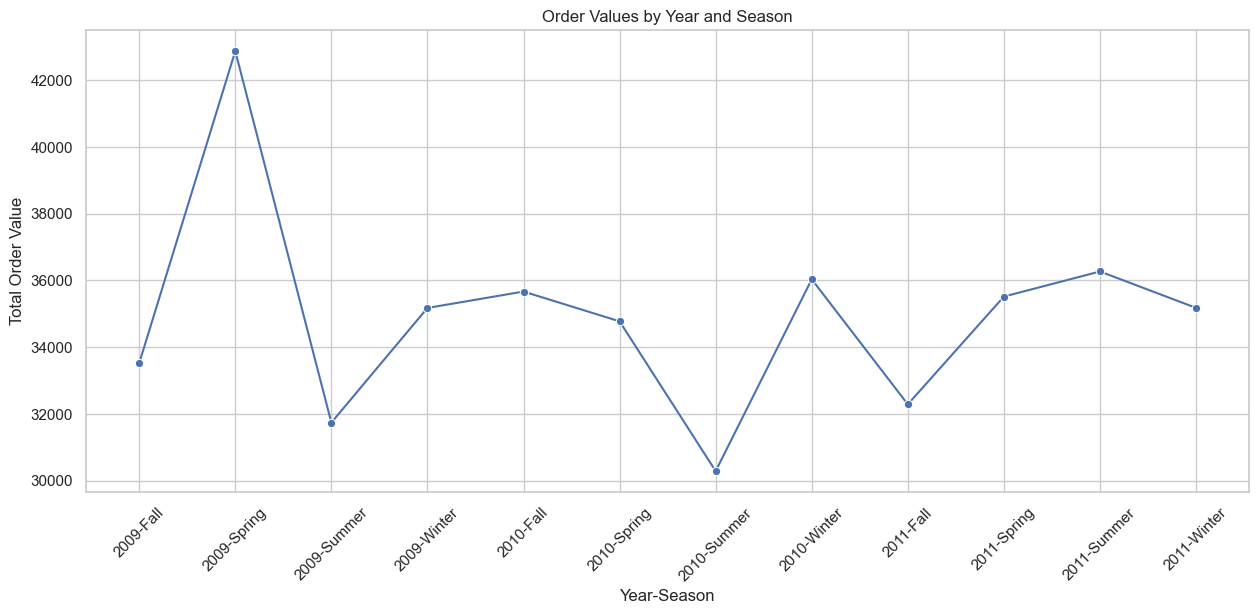

In [465]:
# Create a line plot
plt.figure(figsize=(15, 6))
sns.lineplot(x="Year-Season", y="Value", data=year_season_orders, marker='o')

# Add title and labels
plt.title('Order Values by Year and Season')
plt.xlabel('Year-Season')
plt.ylabel('Total Order Value')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

In [466]:
# Group by country code, order month, and order year
country_monthly_aggregation = df.groupby(['Customer Country Code', 'Order Year', 'Order Month']).agg(
    Total_Items = ('Items', 'sum'),
    Total_Order_Value = ('Value', 'sum')
).reset_index()

# Display the first few rows of the aggregated DataFrame
print(country_monthly_aggregation.head())


  Customer Country Code  Order Year  Order Month  Total_Items  \
0                    DE        2009            1           73   
1                    DE        2009            2           32   
2                    DE        2009            3           69   
3                    DE        2009            4           72   
4                    DE        2009            5           62   

   Total_Order_Value  
0            3064.05  
1            1639.40  
2            3605.90  
3            2416.92  
4            2733.74  


In [467]:
# Create a continuous date from year and month
country_monthly_aggregation['Continuous Date'] = pd.to_datetime(
    country_monthly_aggregation['Order Year'].astype(str) + '-' + 
    country_monthly_aggregation['Order Month'].astype(str) + '-01'
)

# Sort the data
country_monthly_aggregation = country_monthly_aggregation.sort_values('Continuous Date')


In [468]:
country_monthly_aggregation.head()

,Customer Country Code,Order Year,Order Month,Total_Items,Total_Order_Value,Continuous Date
0,DE,2009,1,73,3064.05,2009-01-01
144,IT,2009,1,46,1598.38,2009-01-01
108,GB,2009,1,62,2113.82,2009-01-01
72,FR,2009,1,53,1915.42,2009-01-01
36,ES,2009,1,22,1106.56,2009-01-01


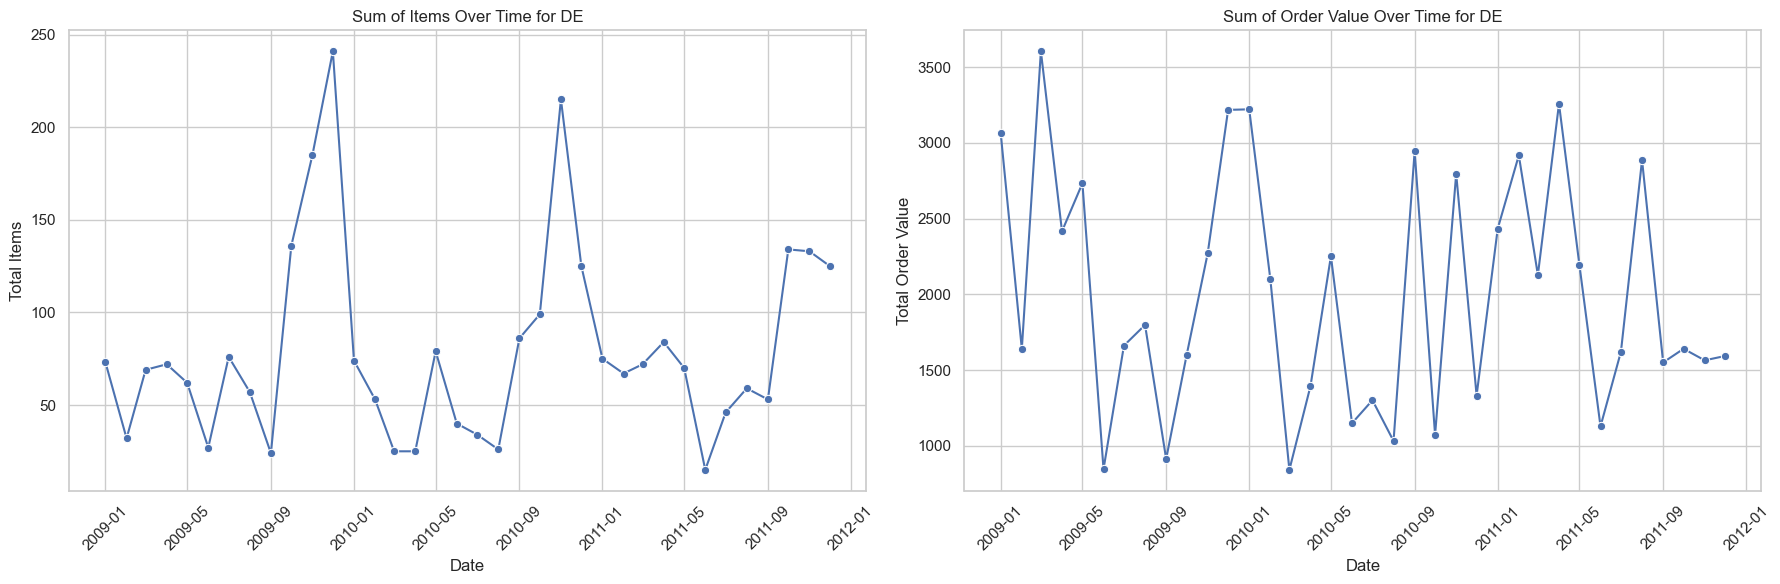

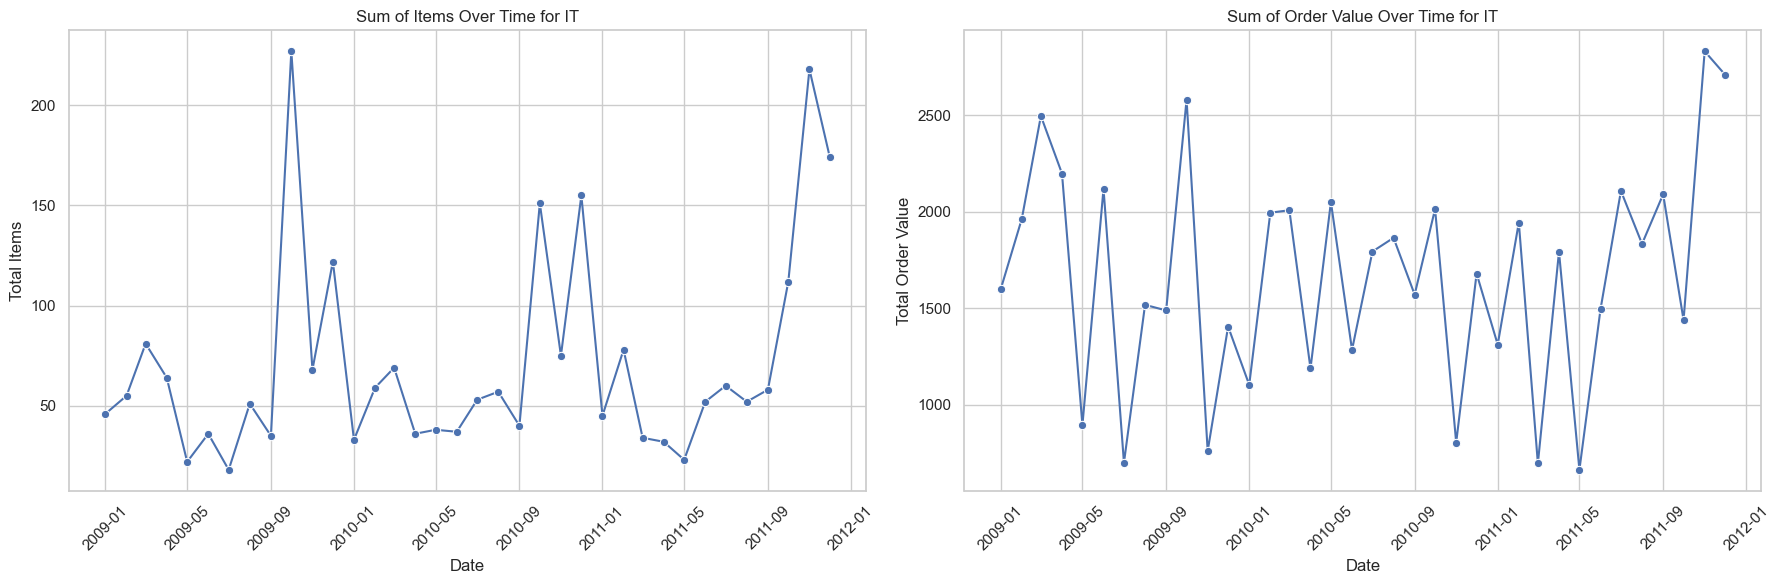

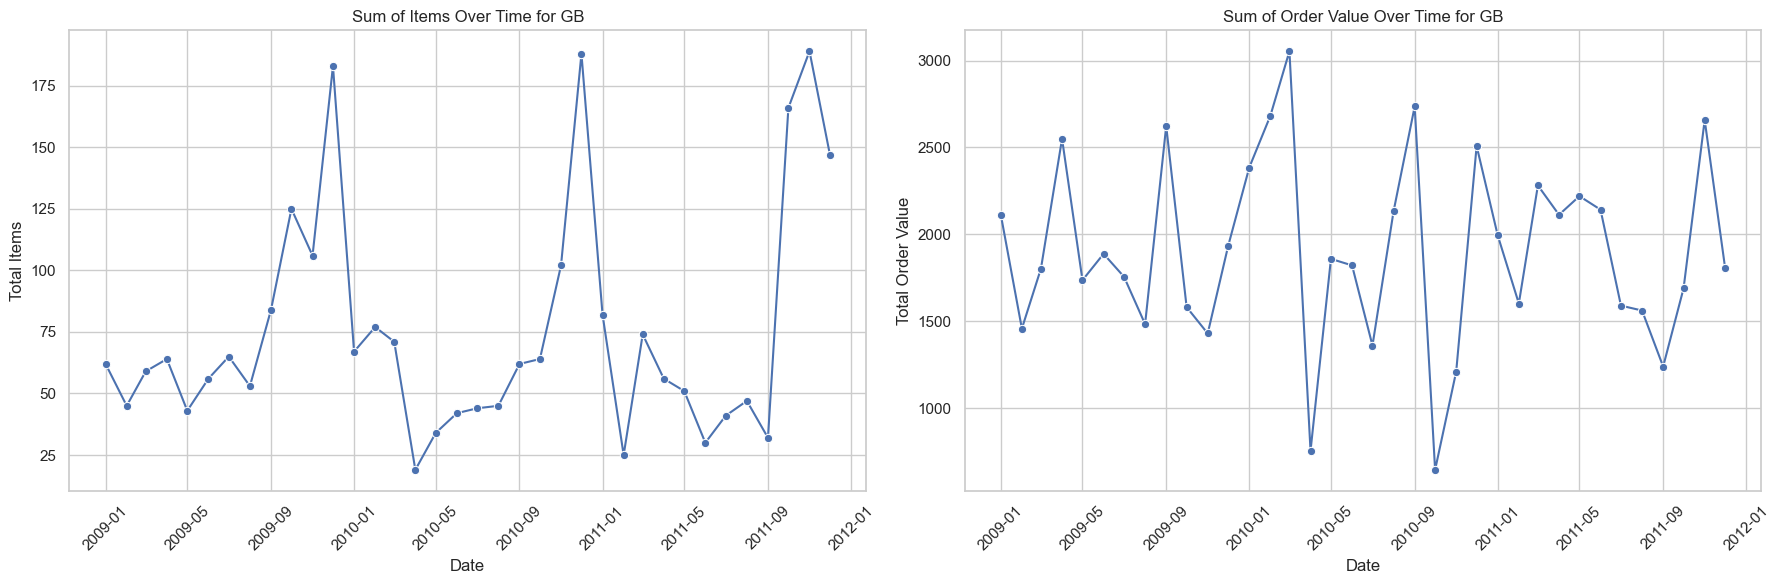

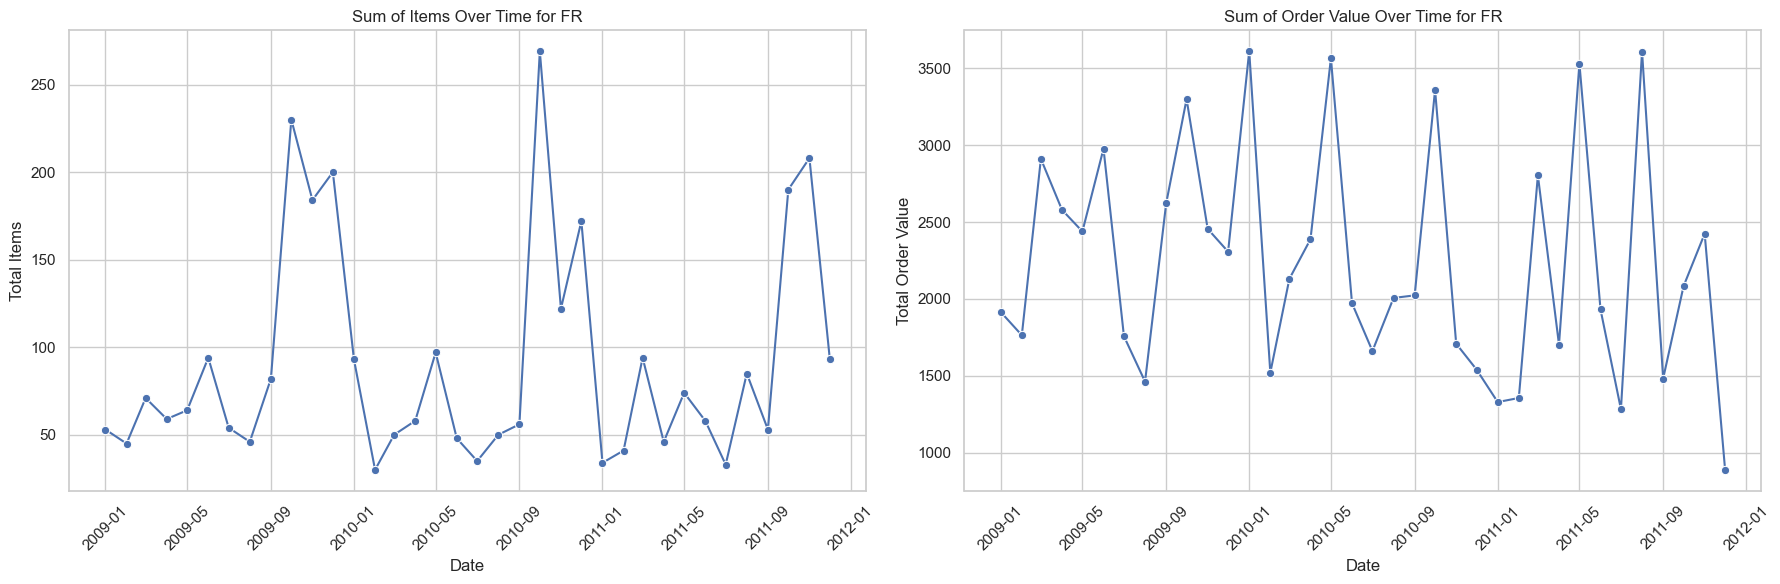

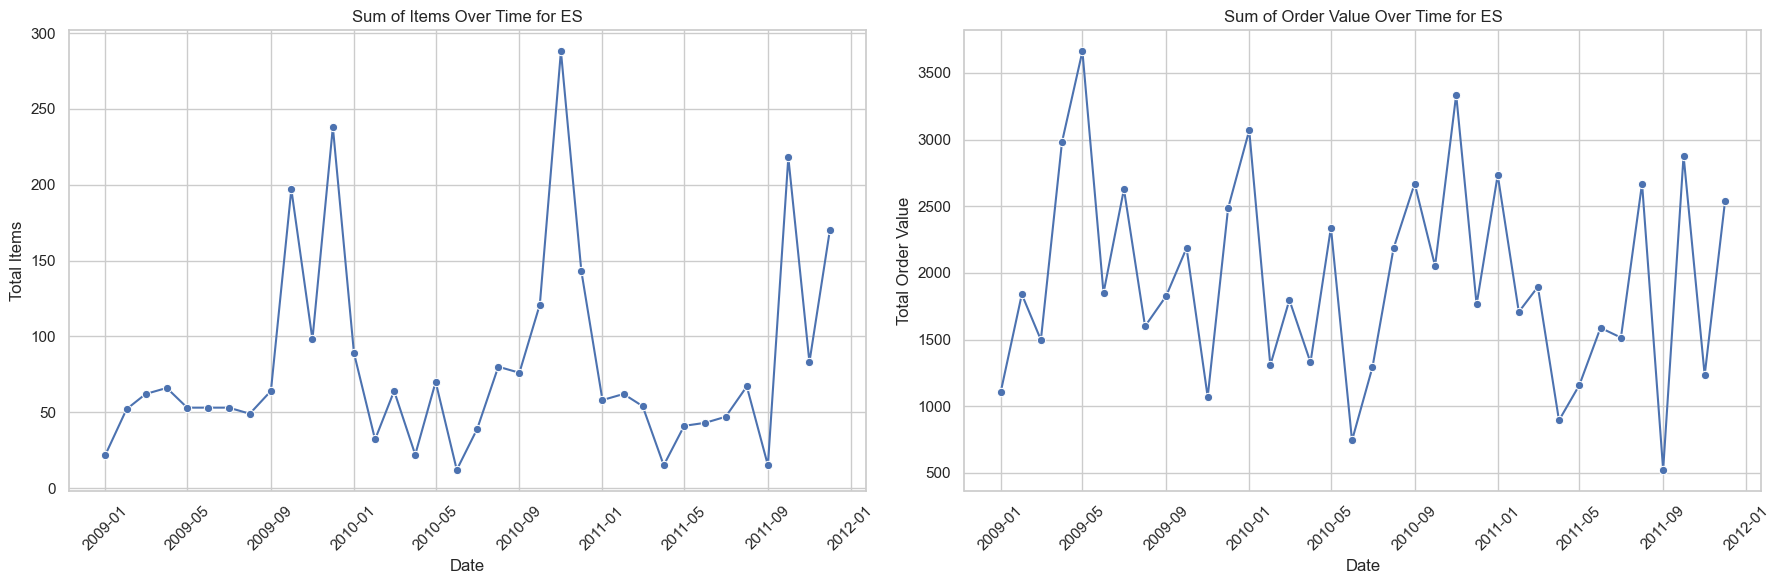

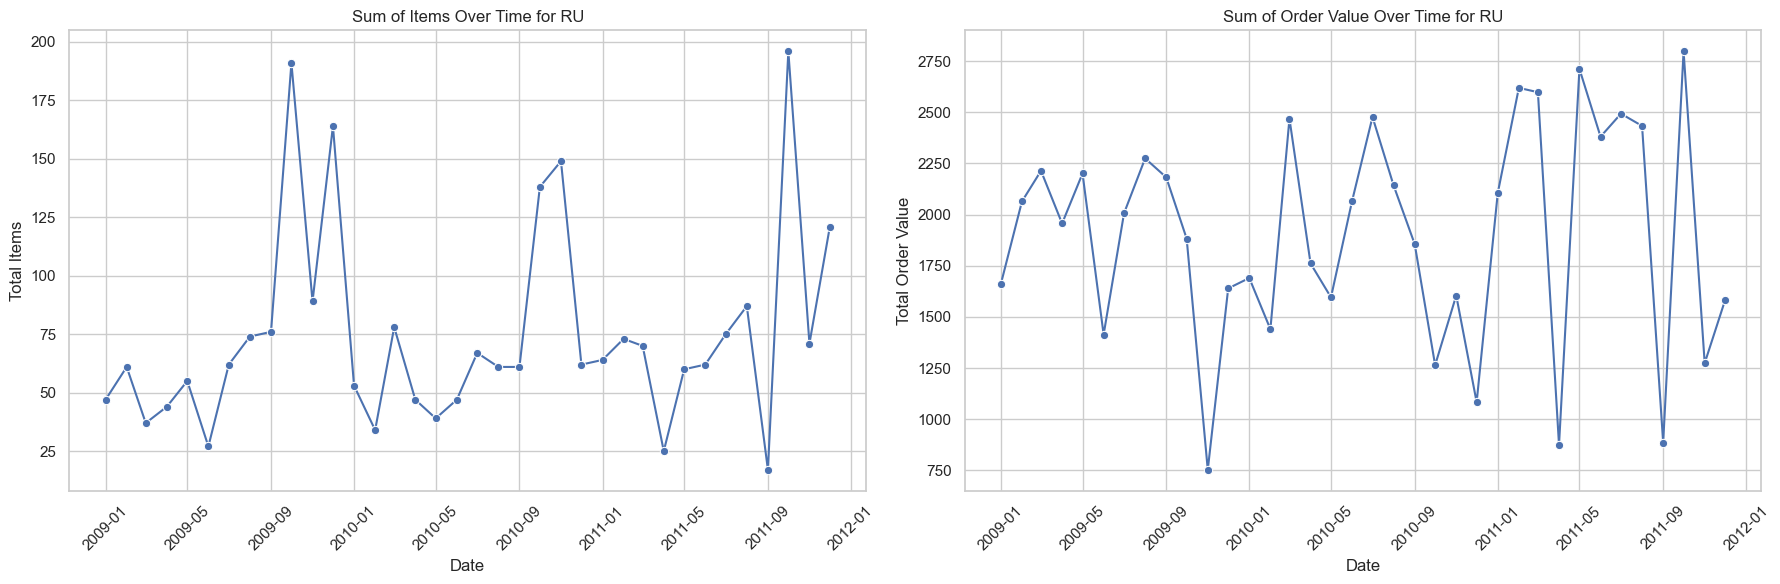

In [469]:
# Iterate through each country code
for country in country_monthly_aggregation['Customer Country Code'].unique():
    # Filter data for the current country
    country_month_data = country_monthly_aggregation[country_monthly_aggregation['Customer Country Code'] == country]

    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(18, 6))

    # First subplot for sum of items
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.lineplot(x="Continuous Date", y="Total_Items", data=country_month_data, marker='o')
    plt.title(f'Sum of Items Over Time for {country}')
    plt.xlabel('Date')
    plt.ylabel('Total Items')
    plt.xticks(rotation=45)

    # Second subplot for sum of order value
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.lineplot(x="Continuous Date", y="Total_Order_Value", data=country_month_data, marker='o')
    plt.title(f'Sum of Order Value Over Time for {country}')
    plt.xlabel('Date')
    plt.ylabel('Total Order Value')
    plt.xticks(rotation=45)

    # Show the plots
    plt.tight_layout()  # Adjusts the plots to fit into the figure neatly
    plt.show()


In [470]:
# Use the previously created 'Season' column and group by country code, season, and year
seasonal_country_aggregation = df.groupby(['Customer Country Code', 'Order Year', 'Season']).agg(
    Total_Items=('Items', 'sum'),
    Total_Order_Value=('Value', 'sum')
).reset_index()

# Create a combined 'Year-Season' column for plotting
seasonal_country_aggregation['Year-Season'] = seasonal_country_aggregation['Order Year'].astype(str) + '-' + seasonal_country_aggregation['Season']


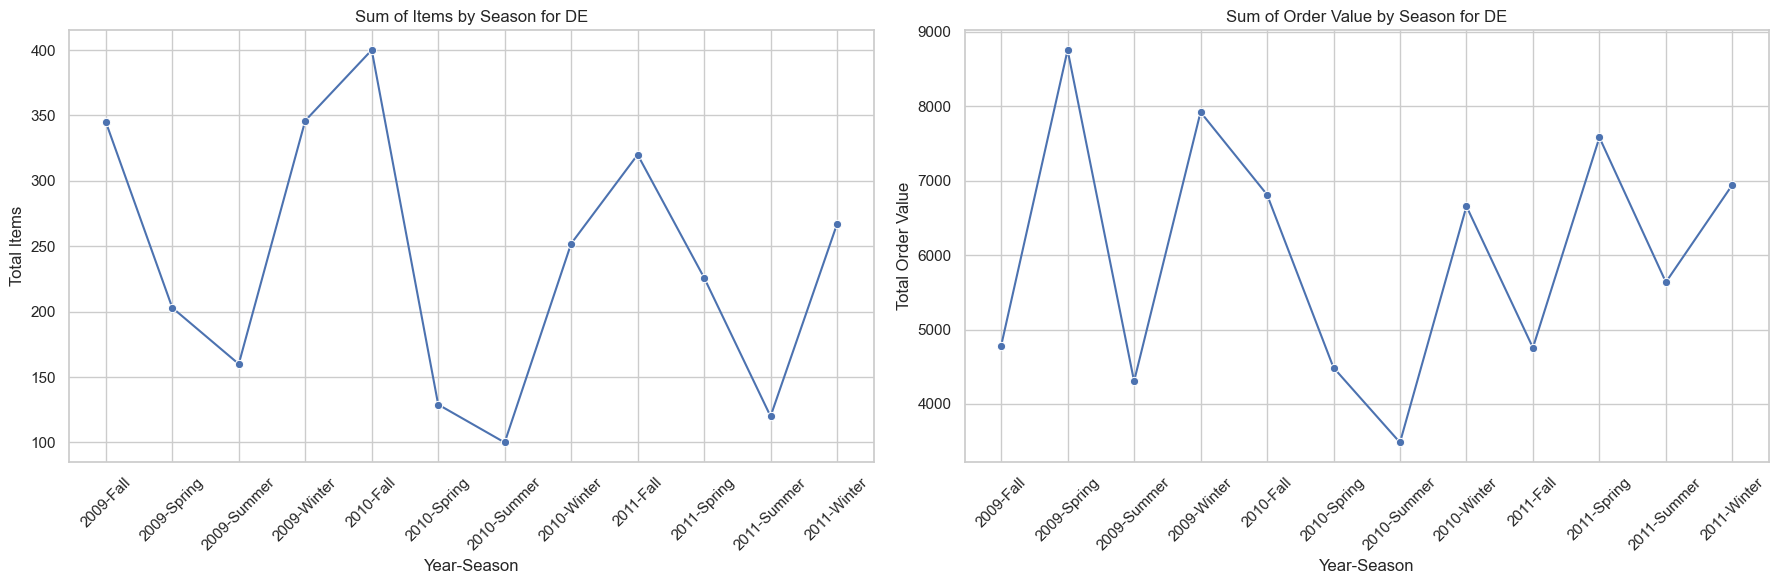

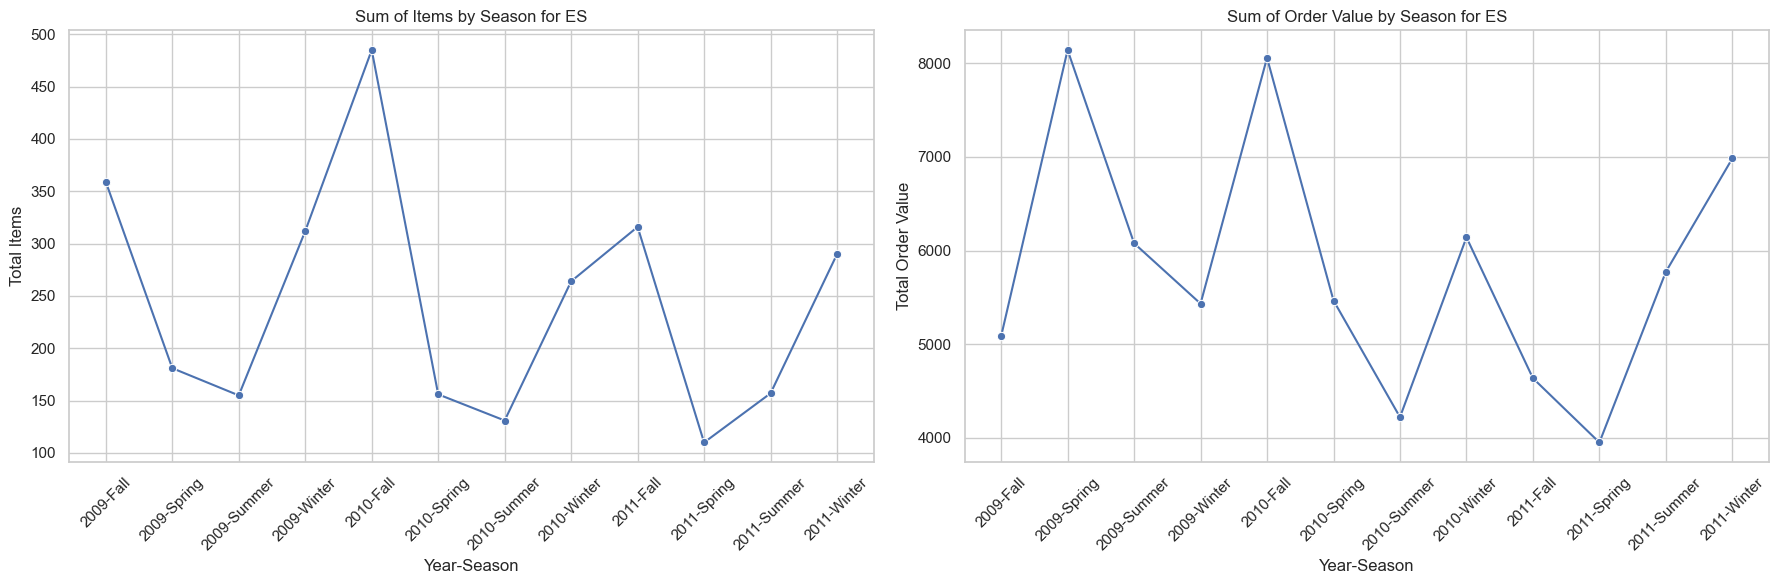

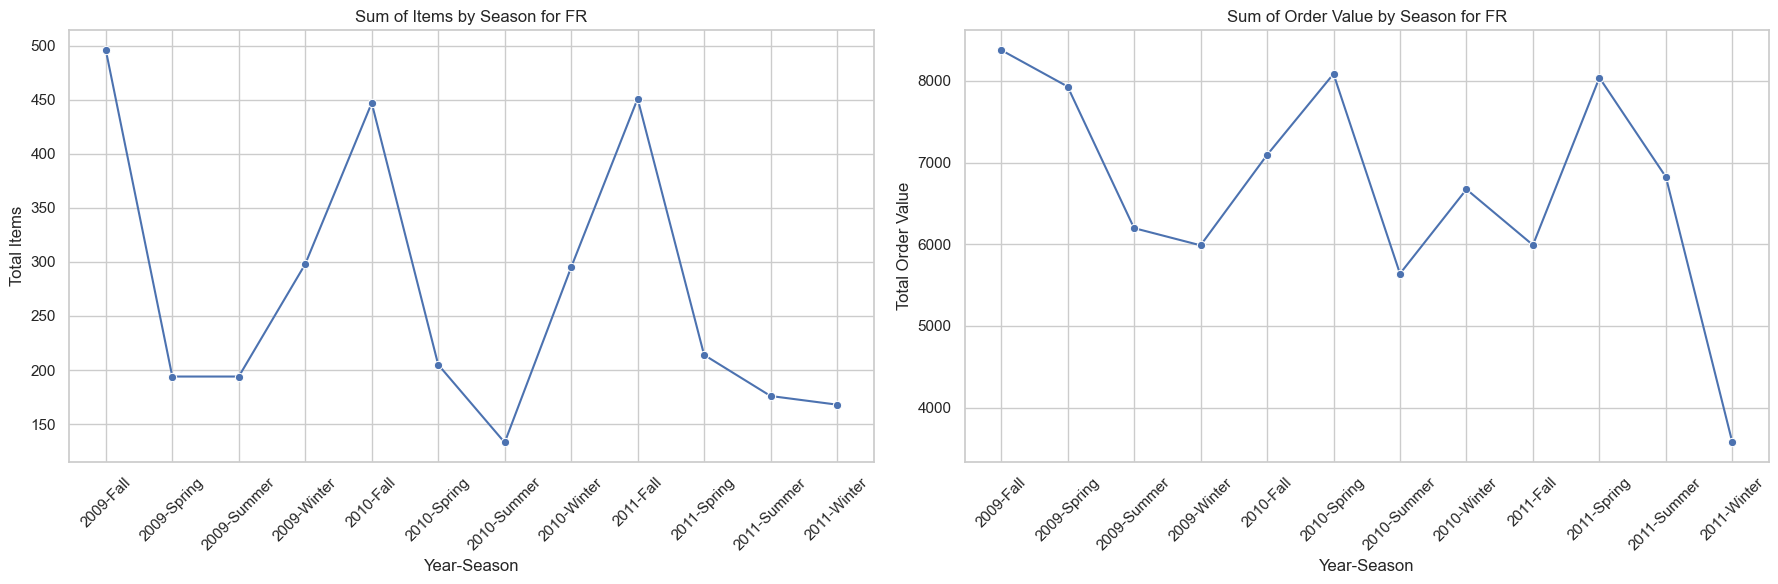

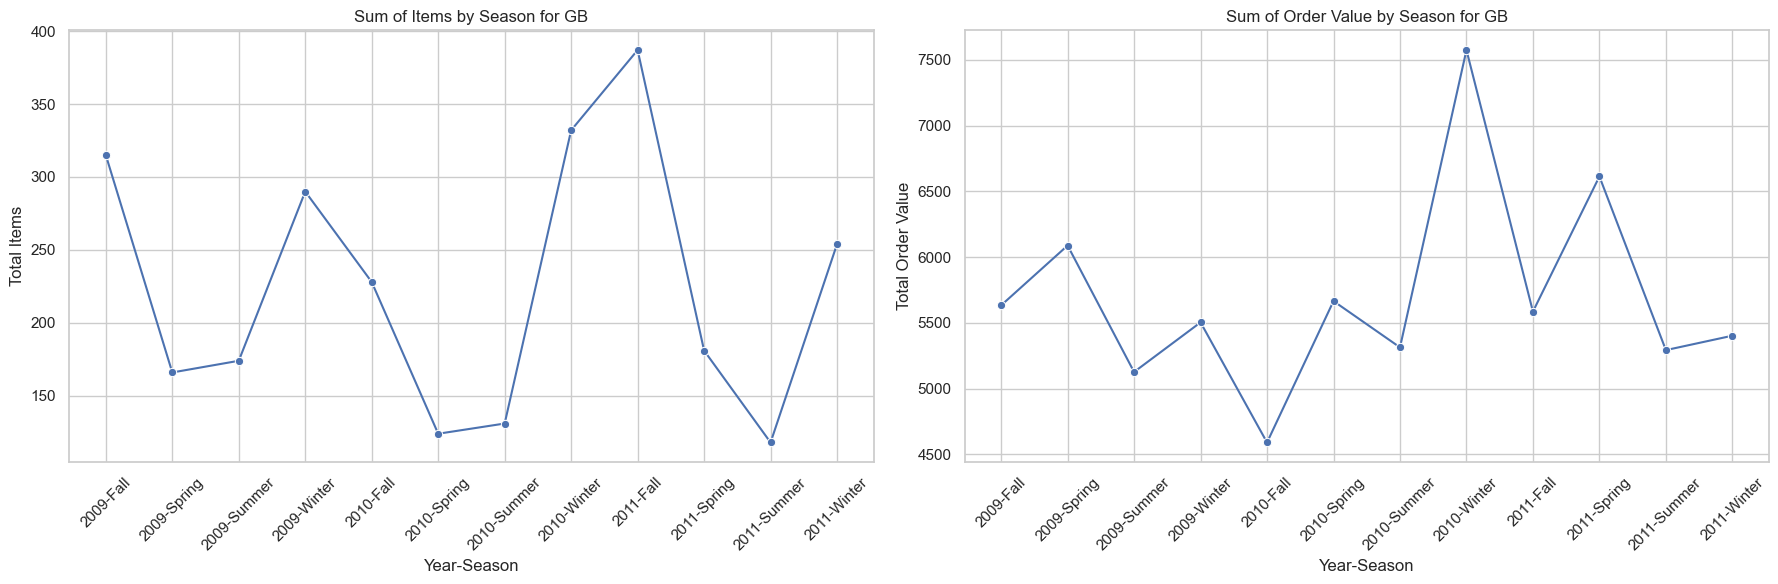

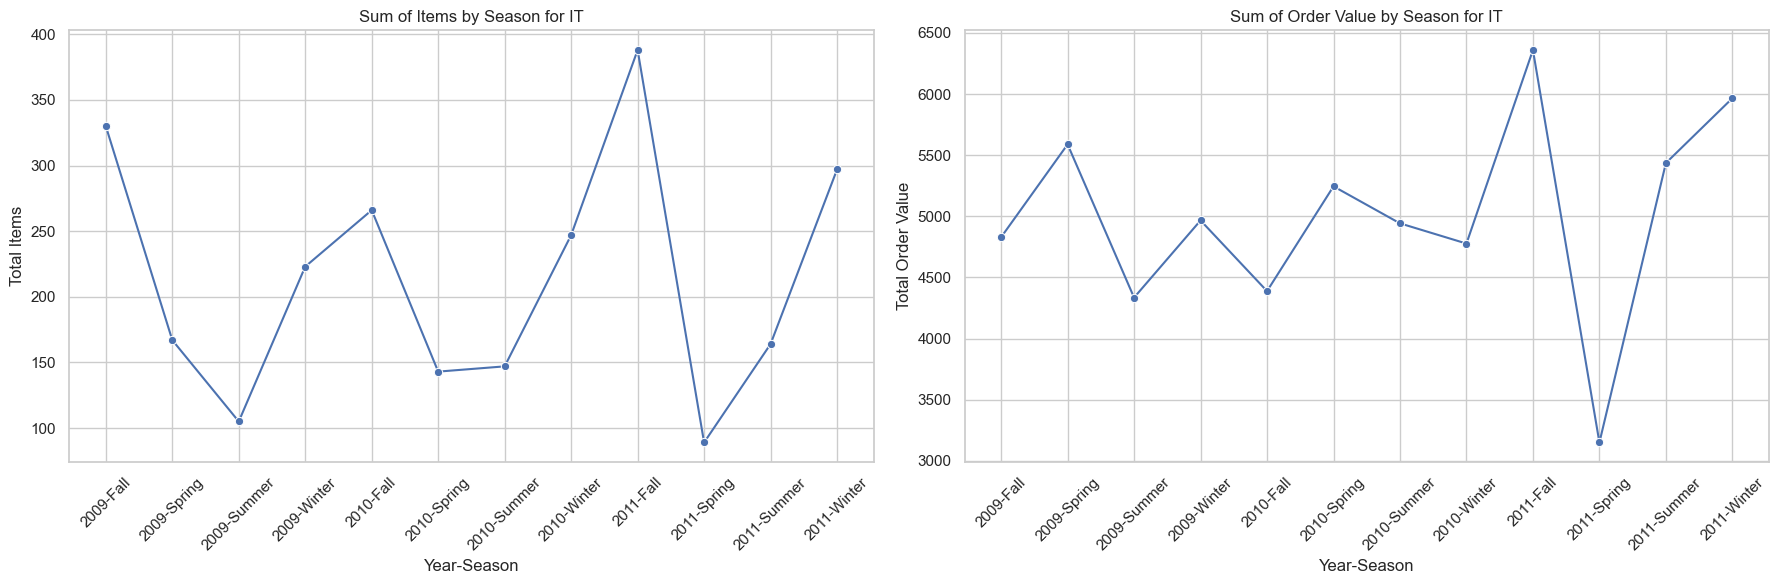

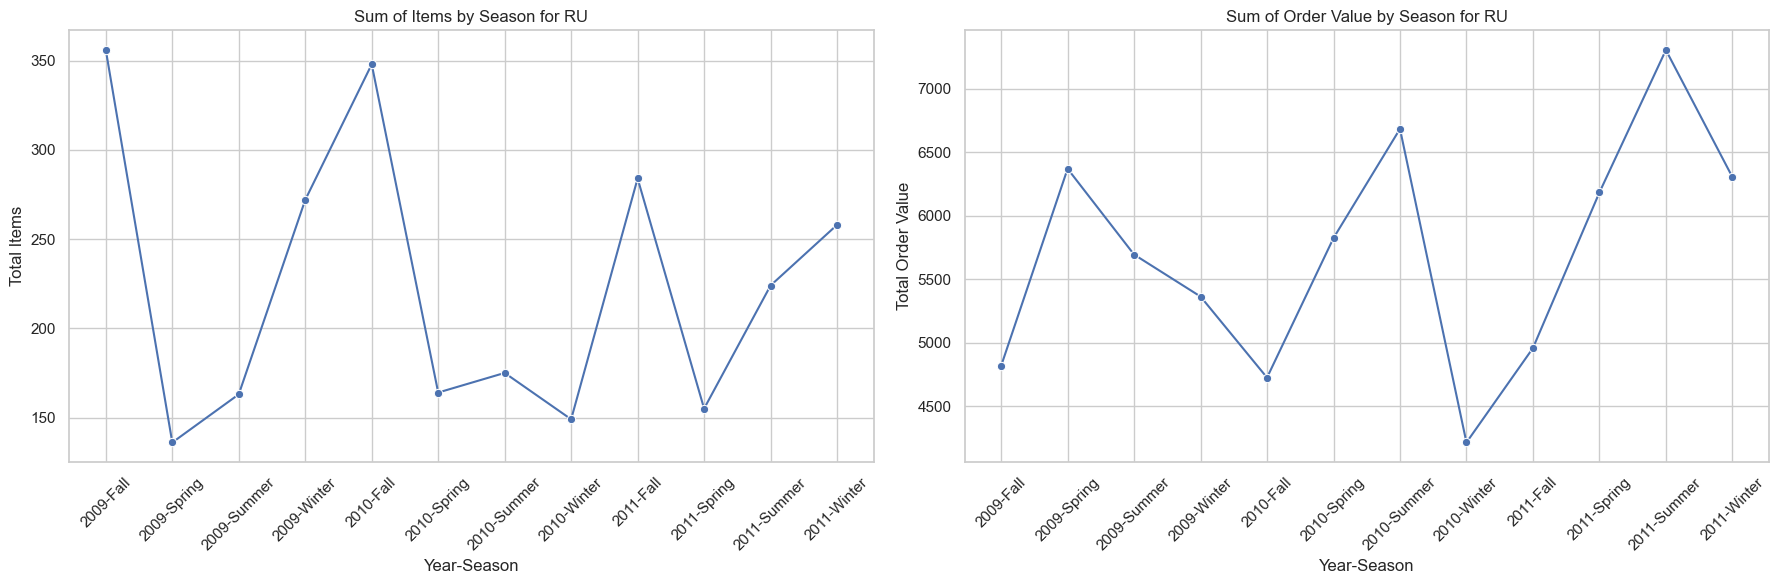

In [471]:
# Iterate through each country code
for country in seasonal_country_aggregation['Customer Country Code'].unique():
    # Filter data for the current country
    country_season_data = seasonal_country_aggregation[seasonal_country_aggregation['Customer Country Code'] == country]

    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(18, 6))

    # First subplot for sum of items
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.lineplot(x="Year-Season", y="Total_Items", data=country_season_data, marker='o')
    plt.title(f'Sum of Items by Season for {country}')
    plt.xlabel('Year-Season')
    plt.ylabel('Total Items')
    plt.xticks(rotation=45)

    # Second subplot for sum of order value
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.lineplot(x="Year-Season", y="Total_Order_Value", data=country_season_data, marker='o')
    plt.title(f'Sum of Order Value by Season for {country}')
    plt.xlabel('Year-Season')
    plt.ylabel('Total Order Value')
    plt.xticks(rotation=45)

    # Show the plots
    plt.tight_layout()  # Adjusts the plots to fit into the figure neatly
    plt.show()


In [472]:
df.head()

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route,Value per Item,Order Month,Order Year,Delivery Month,Delivery Year,Continuous Date,Season,Year-Season
0,2009-01-01,2009-02-18,DE,PK003,Economy Parka,VO,COD00001,269.87,EUR,8,East,33.733750,1,2009,2,2009,2009-01-01,Winter,2009-Winter
1,2009-01-01,2009-02-10,FR,PK001,Advanced Parka,VO,COD00002,170.34,EUR,2,West,85.170000,1,2009,2,2009,2009-01-01,Winter,2009-Winter
2,2009-01-01,2009-01-17,ES,PK002,Premium Parka,VO,COD00003,61.09,EUR,7,West,8.727143,1,2009,1,2009,2009-01-01,Winter,2009-Winter
3,2009-01-03,2009-01-28,IT,PK003,Economy Parka,VO,COD00004,251.18,EUR,6,North,41.863333,1,2009,1,2009,2009-01-01,Winter,2009-Winter
4,2009-01-03,2009-01-18,DE,PK004,Basic Parka,VO,COD00005,153.33,EUR,5,West,30.666000,1,2009,1,2009,2009-01-01,Winter,2009-Winter


In [473]:
df.columns

Index(['Order Date', 'Requested Delivery Date', 'Customer Country Code',
       'Product Code', 'Description', 'Order Type', 'Customer Order Code',
       'Value', 'Currency', 'Items', 'Route', 'Value per Item', 'Order Month',
       'Order Year', 'Delivery Month', 'Delivery Year', 'Continuous Date',
       'Season', 'Year-Season'],
      dtype='object')

In [474]:
# Calculate the difference between 'Requested Delivery Date' and 'Order Date'
df['Lead Time'] = (df['Requested Delivery Date'] - df['Order Date']).dt.days

# Display the first few rows to verify the new column
print(df[['Order Date', 'Requested Delivery Date', 'Lead Time']].head())


  Order Date Requested Delivery Date  Lead Time
0 2009-01-01              2009-02-18         48
1 2009-01-01              2009-02-10         40
2 2009-01-01              2009-01-17         16
3 2009-01-03              2009-01-28         25
4 2009-01-03              2009-01-18         15


In [475]:
# Calculate the difference between 'Requested Delivery Date' and 'Order Date'
df['Lead Time'] = (df['Requested Delivery Date'] - df['Order Date']).dt.days

# Display the first few rows to verify the new column
print(df[['Order Date', 'Requested Delivery Date', 'Lead Time']].head())


  Order Date Requested Delivery Date  Lead Time
0 2009-01-01              2009-02-18         48
1 2009-01-01              2009-02-10         40
2 2009-01-01              2009-01-17         16
3 2009-01-03              2009-01-28         25
4 2009-01-03              2009-01-18         15


In [476]:
df['Value/Item'] = df['Value']/df['Items']

In [477]:
df['Customer_ID'] = df['Customer Country Code'] + '-' + df['Route']

In [478]:
df.head()

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,...,Order Month,Order Year,Delivery Month,Delivery Year,Continuous Date,Season,Year-Season,Lead Time,Value/Item,Customer_ID
0,2009-01-01,2009-02-18,DE,PK003,Economy Parka,VO,COD00001,269.87,EUR,8,...,1,2009,2,2009,2009-01-01,Winter,2009-Winter,48,33.733750,DE-East
1,2009-01-01,2009-02-10,FR,PK001,Advanced Parka,VO,COD00002,170.34,EUR,2,...,1,2009,2,2009,2009-01-01,Winter,2009-Winter,40,85.170000,FR-West
2,2009-01-01,2009-01-17,ES,PK002,Premium Parka,VO,COD00003,61.09,EUR,7,...,1,2009,1,2009,2009-01-01,Winter,2009-Winter,16,8.727143,ES-West
3,2009-01-03,2009-01-28,IT,PK003,Economy Parka,VO,COD00004,251.18,EUR,6,...,1,2009,1,2009,2009-01-01,Winter,2009-Winter,25,41.863333,IT-North
4,2009-01-03,2009-01-18,DE,PK004,Basic Parka,VO,COD00005,153.33,EUR,5,...,1,2009,1,2009,2009-01-01,Winter,2009-Winter,15,30.666000,DE-West


In [479]:
df.columns

Index(['Order Date', 'Requested Delivery Date', 'Customer Country Code',
       'Product Code', 'Description', 'Order Type', 'Customer Order Code',
       'Value', 'Currency', 'Items', 'Route', 'Value per Item', 'Order Month',
       'Order Year', 'Delivery Month', 'Delivery Year', 'Continuous Date',
       'Season', 'Year-Season', 'Lead Time', 'Value/Item', 'Customer_ID'],
      dtype='object')

In [480]:
df = df[['Order Date', 'Requested Delivery Date', 'Lead Time', 'Order Month', 'Order Year',
         'Delivery Month', 'Delivery Year', 'Continuous Date', 'Season', 'Year-Season',
         'Customer Country Code',  'Route', 'Customer_ID', 'Order Type', 'Customer Order Code', 'Product Code', 
         'Description', 'Items', 'Value', 'Value/Item', 'Currency']]


In [481]:
df.head()

,Order Date,Requested Delivery Date,Lead Time,Order Month,Order Year,Delivery Month,Delivery Year,Continuous Date,Season,Year-Season,...,Route,Customer_ID,Order Type,Customer Order Code,Product Code,Description,Items,Value,Value/Item,Currency
0,2009-01-01,2009-02-18,48,1,2009,2,2009,2009-01-01,Winter,2009-Winter,...,East,DE-East,VO,COD00001,PK003,Economy Parka,8,269.87,33.733750,EUR
1,2009-01-01,2009-02-10,40,1,2009,2,2009,2009-01-01,Winter,2009-Winter,...,West,FR-West,VO,COD00002,PK001,Advanced Parka,2,170.34,85.170000,EUR
2,2009-01-01,2009-01-17,16,1,2009,1,2009,2009-01-01,Winter,2009-Winter,...,West,ES-West,VO,COD00003,PK002,Premium Parka,7,61.09,8.727143,EUR
3,2009-01-03,2009-01-28,25,1,2009,1,2009,2009-01-01,Winter,2009-Winter,...,North,IT-North,VO,COD00004,PK003,Economy Parka,6,251.18,41.863333,EUR
4,2009-01-03,2009-01-18,15,1,2009,1,2009,2009-01-01,Winter,2009-Winter,...,West,DE-West,VO,COD00005,PK004,Basic Parka,5,153.33,30.666000,EUR


In [482]:
# Mapping of seasons to numerical representations
season_to_number = {'Winter': '1', 'Spring': '2', 'Summer': '3', 'Fall': '4'}

# Create 'Year-SeasonNumber' column
df['Year-SeasonNumber'] = df['Order Year'].astype(str) + '-' + df['Season'].map(season_to_number)

# Verify the changes
df[['Year-Season', 'Year-SeasonNumber']].head()


,Year-Season,Year-SeasonNumber
0,2009-Winter,2009-1
1,2009-Winter,2009-1
2,2009-Winter,2009-1
3,2009-Winter,2009-1
4,2009-Winter,2009-1


In [483]:
df.columns

Index(['Order Date', 'Requested Delivery Date', 'Lead Time', 'Order Month',
       'Order Year', 'Delivery Month', 'Delivery Year', 'Continuous Date',
       'Season', 'Year-Season', 'Customer Country Code', 'Route',
       'Customer_ID', 'Order Type', 'Customer Order Code', 'Product Code',
       'Description', 'Items', 'Value', 'Value/Item', 'Currency',
       'Year-SeasonNumber'],
      dtype='object')

In [484]:
grouped_df = df.groupby(['Customer_ID', 'Product Code', 'Year-SeasonNumber']).agg(
    Description=('Description', 'first'),
    Sum_Items=('Items', 'sum'),
    Sum_Value=('Value', 'sum'),
    Avg_Value_per_Item=('Value/Item', 'mean'),
    Avg_Lead_Time=('Lead Time', 'mean')
).reset_index()

In [485]:
grouped_df['Year'], grouped_df['SeasonNumber'] = zip(*grouped_df['Year-SeasonNumber'].str.split('-').tolist())
grouped_df['Year'] = grouped_df['Year'].astype(int)
grouped_df['SeasonNumber'] = grouped_df['SeasonNumber'].astype(int)

grouped_df = grouped_df.sort_values(by=['Customer_ID', 'Year', 'SeasonNumber'])

In [486]:
grouped_df.head(10)

,Customer_ID,Product Code,Year-SeasonNumber,Description,Sum_Items,Sum_Value,Avg_Value_per_Item,Avg_Lead_Time,Year,SeasonNumber
0,DE-East,PK001,2009-1,Advanced Parka,9,392.66,43.382750,12.5,2009,1
10,DE-East,PK002,2009-1,Premium Parka,18,624.04,67.983619,28.0,2009,1
20,DE-East,PK003,2009-1,Economy Parka,42,1057.34,34.690576,32.0,2009,1
30,DE-East,PK004,2009-1,Basic Parka,5,517.79,155.537500,26.0,2009,1
1,DE-East,PK001,2009-2,Advanced Parka,9,503.99,63.237500,23.5,2009,2
11,DE-East,PK002,2009-2,Premium Parka,13,255.54,20.500500,33.5,2009,2
21,DE-East,PK003,2009-2,Economy Parka,46,1148.57,26.809998,33.0,2009,2
31,DE-East,PK004,2009-2,Basic Parka,11,220.19,24.446071,9.5,2009,2
2,DE-East,PK001,2009-3,Advanced Parka,8,390.36,62.698333,32.0,2009,3
22,DE-East,PK003,2009-3,Economy Parka,7,209.00,29.857143,10.0,2009,3


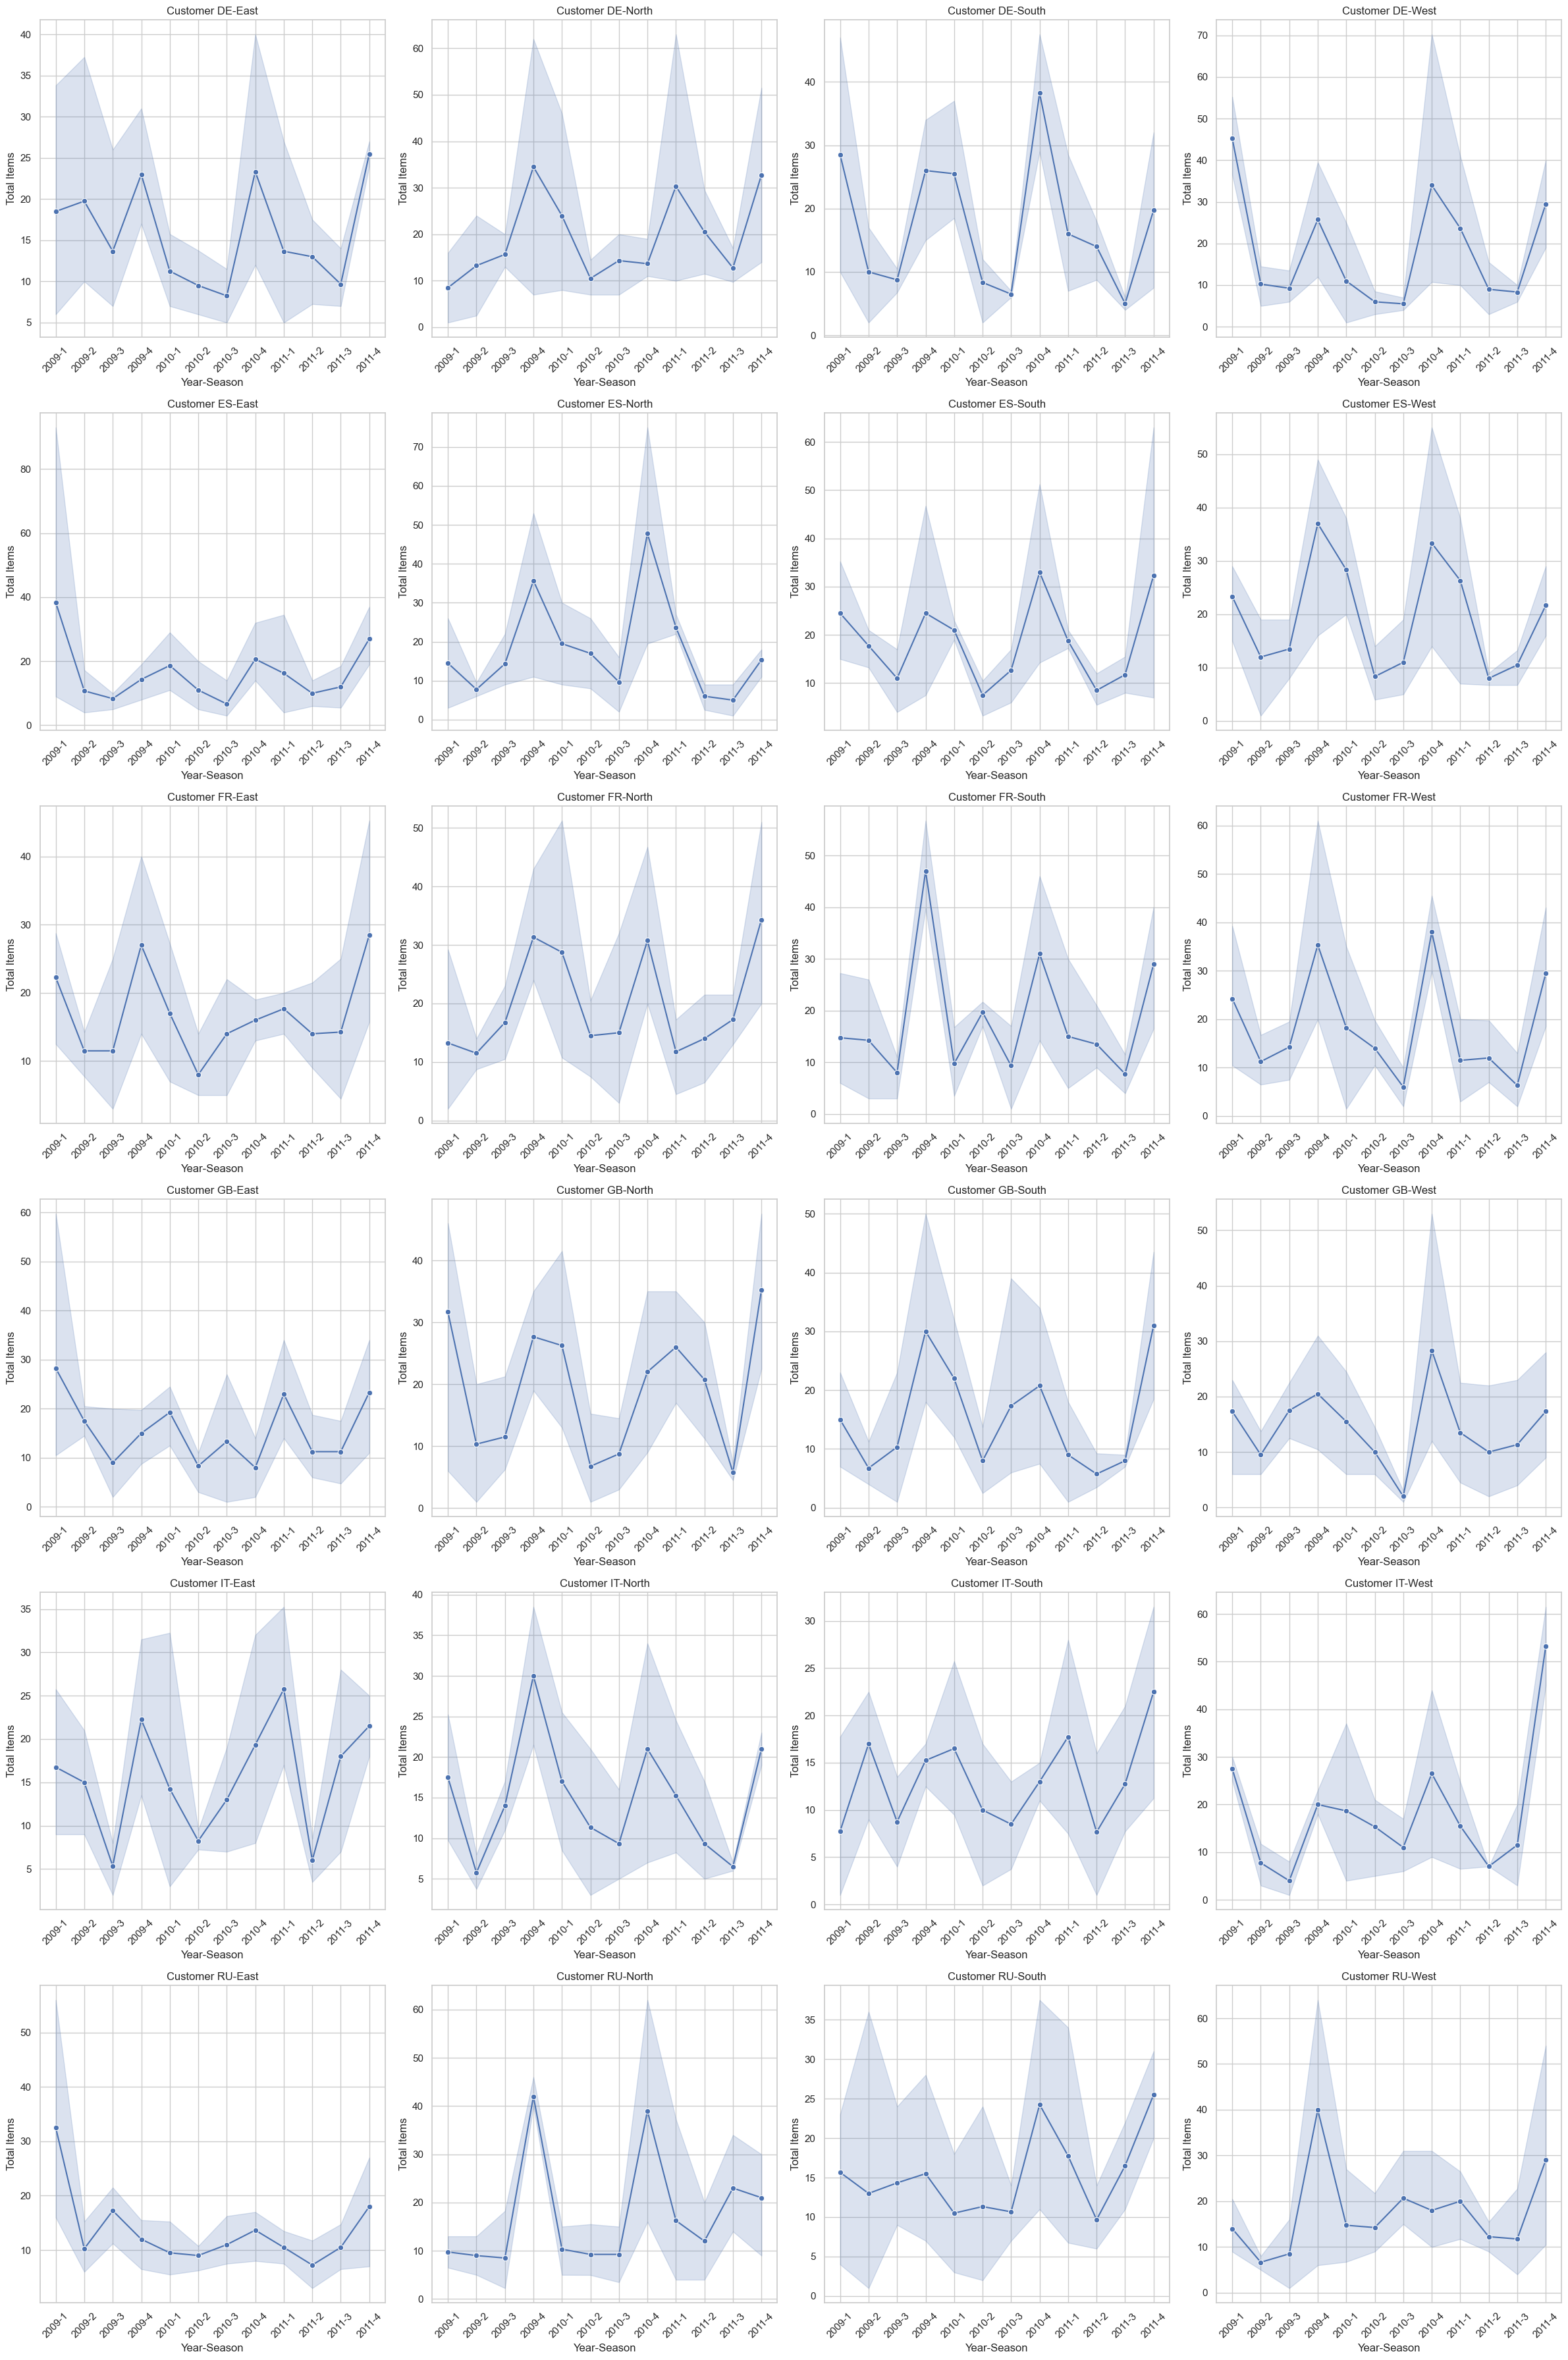

In [487]:
sns.set(style="whitegrid")

# Get unique customer IDs
unique_customer_ids = grouped_df['Customer_ID'].unique()
num_customers = len(unique_customer_ids)
num_rows = (num_customers + 3) // 4  # Calculate the number of rows needed for 4 graphs per row

# Create subplots in a grid
fig, axes = plt.subplots(num_rows, 4, figsize=(24, 6 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten for easy iteration

for i, customer_id in enumerate(unique_customer_ids):
    customer_data = grouped_df[grouped_df['Customer_ID'] == customer_id]
    sns.lineplot(ax=axes[i], x="Year-SeasonNumber", y="Sum_Items", data=customer_data, marker='o')
    axes[i].set_title(f'Customer {customer_id}')
    axes[i].set_xlabel('Year-Season')
    axes[i].set_ylabel('Total Items')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, num_rows * 4):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [488]:
total_items_per_customer_season = grouped_df.groupby(['Customer_ID', 'Year-SeasonNumber'])['Sum_Items'].sum().reset_index()
total_items_per_customer_season.rename(columns={'Sum_Items': 'Total_Items_Per_Season'}, inplace=True)

grouped_df = pd.merge(grouped_df, total_items_per_customer_season, on=['Customer_ID', 'Year-SeasonNumber'])
grouped_df['Item_Units_Ratio'] = grouped_df['Sum_Items'] / grouped_df['Total_Items_Per_Season']
grouped_df.head()


,Customer_ID,Product Code,Year-SeasonNumber,Description,Sum_Items,Sum_Value,Avg_Value_per_Item,Avg_Lead_Time,Year,SeasonNumber,Total_Items_Per_Season,Item_Units_Ratio
0,DE-East,PK001,2009-1,Advanced Parka,9,392.66,43.382750,12.5,2009,1,74,0.121622
1,DE-East,PK002,2009-1,Premium Parka,18,624.04,67.983619,28.0,2009,1,74,0.243243
2,DE-East,PK003,2009-1,Economy Parka,42,1057.34,34.690576,32.0,2009,1,74,0.567568
3,DE-East,PK004,2009-1,Basic Parka,5,517.79,155.537500,26.0,2009,1,74,0.067568
4,DE-East,PK001,2009-2,Advanced Parka,9,503.99,63.237500,23.5,2009,2,79,0.113924


In [489]:
grouped_df[['Year', 'SeasonNumber']] = grouped_df['Year-SeasonNumber'].str.split('-', expand=True).astype(int)

In [490]:
# Step 1: Sort the DataFrame
grouped_df.sort_values(by=['Customer_ID', 'Product Code', 'Year-SeasonNumber'], inplace=True)

# Step 2: Create the lag feature
grouped_df['Prev_Season_Demand'] = grouped_df.groupby(['Customer_ID', 'Product Code'])['Sum_Items'].shift(1)

# Fill missing values for the first entry of each group with 0 or an appropriate value
grouped_df['Prev_Season_Demand'].fillna(0, inplace=True)

# Display the DataFrame to verify the new column
grouped_df.head()


,Customer_ID,Product Code,Year-SeasonNumber,Description,Sum_Items,Sum_Value,Avg_Value_per_Item,Avg_Lead_Time,Year,SeasonNumber,Total_Items_Per_Season,Item_Units_Ratio,Prev_Season_Demand
0,DE-East,PK001,2009-1,Advanced Parka,9,392.66,43.382750,12.5,2009,1,74,0.121622,0.0
4,DE-East,PK001,2009-2,Advanced Parka,9,503.99,63.237500,23.5,2009,2,79,0.113924,9.0
8,DE-East,PK001,2009-3,Advanced Parka,8,390.36,62.698333,32.0,2009,3,41,0.195122,9.0
11,DE-East,PK001,2009-4,Advanced Parka,31,288.42,19.220976,41.0,2009,4,69,0.449275,8.0
14,DE-East,PK001,2010-1,Advanced Parka,9,84.80,9.422222,14.0,2010,1,45,0.200000,31.0


In [491]:
grouped_df.columns

Index(['Customer_ID', 'Product Code', 'Year-SeasonNumber', 'Description',
       'Sum_Items', 'Sum_Value', 'Avg_Value_per_Item', 'Avg_Lead_Time', 'Year',
       'SeasonNumber', 'Total_Items_Per_Season', 'Item_Units_Ratio',
       'Prev_Season_Demand'],
      dtype='object')

In [492]:
# Step 1: Create a helper column for previous year's same season
grouped_df['Prev_Year'] = grouped_df['Year'] - 1
grouped_df['Prev_Year_Same_Season'] = grouped_df['Prev_Year'].astype(str) + '-' + grouped_df['SeasonNumber'].astype(str)

# Step 2: Merge the DataFrame with itself
# Create a temporary DataFrame with necessary columns for merging
temp_df = grouped_df[['Customer_ID', 'Product Code', 'Year-SeasonNumber', 'Sum_Items']].copy()
temp_df.rename(columns={'Year-SeasonNumber': 'Prev_Year_Same_Season', 'Sum_Items': 'Prev_Year_Season_Demand'}, inplace=True)

# Perform the merge
grouped_df = pd.merge(grouped_df, temp_df, on=['Customer_ID', 'Product Code', 'Prev_Year_Same_Season'], how='left')

# Fill missing values for the first year in the dataset where previous year data is not available
grouped_df['Prev_Year_Season_Demand'].fillna(0, inplace=True)

# Drop the helper column 'Prev_Year_Same_Season' if it's no longer needed
grouped_df.drop({'Prev_Year_Same_Season', 'Prev_Year'}, axis=1, inplace=True)


In [493]:
# Display the DataFrame to verify the new column
grouped_df.head()

,Customer_ID,Product Code,Year-SeasonNumber,Description,Sum_Items,Sum_Value,Avg_Value_per_Item,Avg_Lead_Time,Year,SeasonNumber,Total_Items_Per_Season,Item_Units_Ratio,Prev_Season_Demand,Prev_Year_Season_Demand
0,DE-East,PK001,2009-1,Advanced Parka,9,392.66,43.382750,12.5,2009,1,74,0.121622,0.0,0.0
1,DE-East,PK001,2009-2,Advanced Parka,9,503.99,63.237500,23.5,2009,2,79,0.113924,9.0,0.0
2,DE-East,PK001,2009-3,Advanced Parka,8,390.36,62.698333,32.0,2009,3,41,0.195122,9.0,0.0
3,DE-East,PK001,2009-4,Advanced Parka,31,288.42,19.220976,41.0,2009,4,69,0.449275,8.0,0.0
4,DE-East,PK001,2010-1,Advanced Parka,9,84.80,9.422222,14.0,2010,1,45,0.200000,31.0,9.0


In [494]:
grouped_df['Year-SeasonNumber'].unique()

array(['2009-1', '2009-2', '2009-3', '2009-4', '2010-1', '2010-2',
       '2010-3', '2010-4', '2011-2', '2011-3', '2011-1', '2011-4'],
      dtype=object)

In [495]:
categorical_features = ['Customer_ID', 'Product Code', 'Year', 'SeasonNumber']
numerical_features = ['Sum_Items', 'Sum_Value', 'Avg_Value_per_Item', 'Avg_Lead_Time', 'Item_Units_Ratio', 'Total_Items_Per_Season', 'Prev_Season_Demand', "Prev_Year_Season_Demand" ]


target = 'Item_Units_Ratio'

In [496]:
X = grouped_df[categorical_features + numerical_features]
y = grouped_df[target]

In [497]:
numerical_features.remove(target)

In [498]:
train_mask = grouped_df['Year-SeasonNumber'] < '2011-03'
test_mask = grouped_df['Year-SeasonNumber'] >= '2011-03'
X_train = X[train_mask]
y_train = y[train_mask]

In [506]:
test_features = [feat for feat in categorical_features + numerical_features if feat not in [{'Item_Units_Ratio', 'Total_Items_Per_Season', 'Avg_Lead_Time', 'Avg_Value_per_Item', 'Sum_Value', 'Sum_Items'}]]
X_test = X[test_mask][test_features]
y_test = y[test_mask]

In [507]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [510]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)])

In [511]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.005245921222735725


R-squared: 0.8042590668913034
Mean Absolute Error: 0.05245358756268138
Root Mean Squared Error: 0.07242873202490656


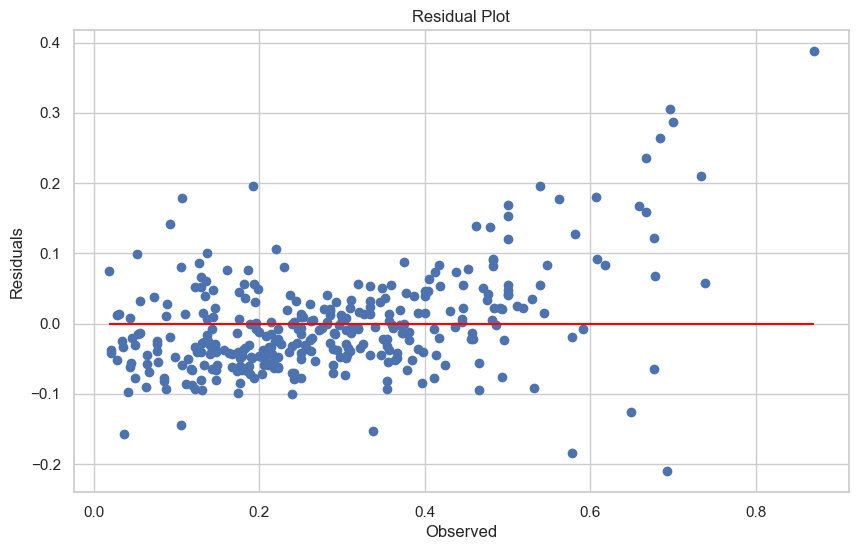

In [512]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)  # Using the MSE calculated earlier
print(f'Root Mean Squared Error: {rmse}')

# Plotting Residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.title('Residual Plot')
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.show()

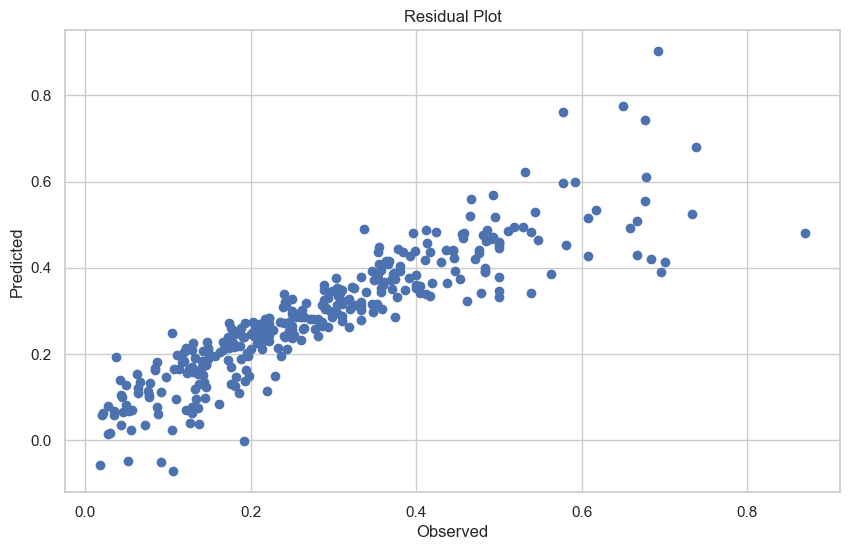

In [513]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Residual Plot')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

In [514]:
# Step 1: Extract relevant columns for the test set rows
test_data = grouped_df[test_mask][['Customer_ID', 'Product Code', 'SeasonNumber', 'Year']]

# Step 2: Add predictions (y_pred)
test_data['Predicted_Ratio'] = y_pred

# Step 3: Add actual values (y_test)
# Since y_test is a NumPy array, convert it to a series with the same index as test_data for proper alignment
test_data['Actual_Ratio'] = y_test.reset_index(drop=True)

# Display the DataFrame
test_data.head()


,Customer_ID,Product Code,SeasonNumber,Year,Predicted_Ratio,Actual_Ratio
8,DE-East,PK001,2,2011,0.236347,0.658537
9,DE-East,PK001,3,2011,0.400262,0.326923
16,DE-East,PK002,1,2011,0.214475,0.365854
17,DE-East,PK002,2,2011,0.316060,0.176471
18,DE-East,PK002,3,2011,0.320635,0.122137
